# GLM analysis


In [ ]:
import pandas as pd
from Regroup.setup import *

X = downsize_X_v1('After_The_Rain')
Y = setup_Y_fmri(X)

Final trimmed data shape: (91, 109, 91, 382)


In [2]:
import numpy as np
from nilearn.glm.first_level import FirstLevelModel

# Create design matrix for fMRI
# X is the design matrix (regressors)
# Y is the fMRI data (time series of voxels around the brain)

# Initialize the GLM model
model = FirstLevelModel(t_r=1.3, slice_time_ref=0.5)

# Fit the model to your data
model.fit(Y, design_matrices=X)

FirstLevelModel(slice_time_ref=0.5, t_r=1.3)

### Create the contrast vector to compare let's say 2 groups

- E.g : brightness and contrast

In [9]:
# Create a contrast vector for comparing brightness and contrast
contrast_def = np.zeros(199)  # nb of feature columns

contrast_def[0] = 1  # Brightness 
contrast_def[1] = -1  # Contrast 

# Compute the contrast
z_map = model.compute_contrast(contrast_def)

#### Visualize 

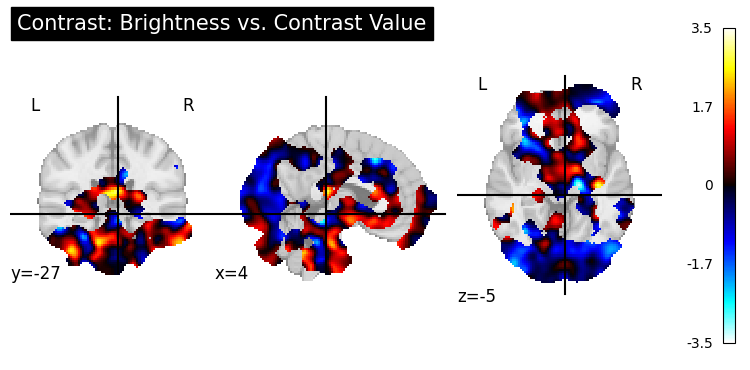

In [ ]:
from nilearn import plotting

# Visualize the contrast result (z_map)
plotting.plot_stat_map(z_map, title="Contrast: Brightness vs. Contrast Value", display_mode='ortho', draw_cross=True, colorbar=True)

# Show the plot
plotting.show()

In [ ]:
import numpy as np


# Identity contrast for each feature (extracts betas one by one)
n_features = X.shape[1]
betas = []

for i in range(n_features):
    #print(f"{i+1}/{n_features}")
    contrast_vector = np.zeros(n_features)
    contrast_vector[i] = 1  # Identity contrast for the i-th feature
    beta_map = model.compute_contrast(contrast_vector, output_type='effect_size')
    betas.append(beta_map)

print(f"Extracted {len(betas)} beta maps.")

1/198
2/198
3/198
4/198
5/198
6/198
7/198
8/198
9/198
10/198
11/198
12/198
13/198
14/198
15/198
16/198
17/198
18/198
19/198
20/198
21/198
22/198
23/198
24/198
25/198
26/198
27/198
28/198
29/198
30/198
31/198
32/198
33/198
34/198
35/198
36/198
37/198
38/198
39/198
40/198
41/198
42/198
43/198
44/198
45/198
46/198
47/198
48/198
49/198
50/198
51/198
52/198
53/198
54/198
55/198
56/198
57/198
58/198
59/198
60/198
61/198
62/198
63/198
64/198
65/198
66/198
67/198
68/198
69/198
70/198
71/198
72/198
73/198
74/198
75/198
76/198
77/198
78/198
79/198
80/198
81/198
82/198
83/198
84/198
85/198
86/198
87/198
88/198
89/198
90/198
91/198
92/198
93/198
94/198
95/198
96/198
97/198
98/198
99/198
100/198
101/198
102/198
103/198
104/198
105/198
106/198
107/198
108/198
109/198
110/198
111/198
112/198
113/198
114/198
115/198
116/198
117/198
118/198
119/198
120/198
121/198
122/198
123/198
124/198
125/198
126/198
127/198
128/198
129/198
130/198
131/198
132/198
133/198
134/198
135/198
136/198
137/198
138/198
139/

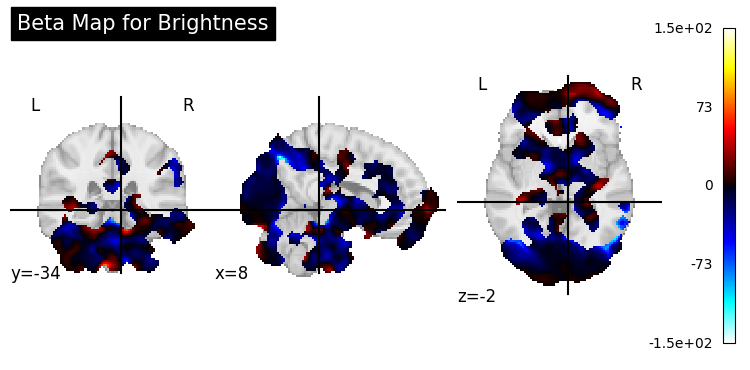

In [8]:
from nilearn import plotting

# Plot the beta map for the first feature (brightness, for example)
plotting.plot_stat_map(betas[0], title="Beta Map for Brightness", display_mode='ortho', colorbar=True)
plotting.show()

### Let's work with statistical inference to find the more important features

In [ ]:
import numpy as np

# Create and store z-maps for each feature
z_maps = []

for i in range(X.shape[1]):
    #print(f"{i+1}/{X.shape[1]}")
    contrast_vector = np.zeros(X.shape[1])
    contrast_vector[i] = 1  # Identity contrast for each feature
    z_map = model.compute_contrast(contrast_vector, output_type='z_score')
    z_maps.append(z_map)


1/198
2/198
3/198
4/198
5/198
6/198
7/198
8/198
9/198
10/198
11/198
12/198
13/198
14/198
15/198
16/198
17/198
18/198
19/198
20/198
21/198
22/198
23/198
24/198
25/198
26/198
27/198
28/198
29/198
30/198
31/198
32/198
33/198
34/198
35/198
36/198
37/198
38/198
39/198
40/198
41/198
42/198
43/198
44/198
45/198
46/198
47/198
48/198
49/198
50/198
51/198
52/198
53/198
54/198
55/198
56/198
57/198
58/198
59/198
60/198
61/198
62/198
63/198
64/198
65/198
66/198
67/198
68/198
69/198
70/198
71/198
72/198
73/198
74/198
75/198
76/198
77/198
78/198
79/198
80/198
81/198
82/198
83/198
84/198
85/198
86/198
87/198
88/198
89/198
90/198
91/198
92/198
93/198
94/198
95/198
96/198
97/198
98/198
99/198
100/198
101/198
102/198
103/198
104/198
105/198
106/198
107/198
108/198
109/198
110/198
111/198
112/198
113/198
114/198
115/198
116/198
117/198
118/198
119/198
120/198
121/198
122/198
123/198
124/198
125/198
126/198
127/198
128/198
129/198
130/198
131/198
132/198
133/198
134/198
135/198
136/198
137/198
138/198
139/

/Users/shrinidhivelan/miniconda3/envs/ObjectDetection/lib/python3.9/site-packages/nilearn/glm/thresholding.py:297: UserWarning: The given float value must not exceed 4.355323617593642. But, you have given threshold=inf.
  stat_img = threshold_img(
/Users/shrinidhivelan/miniconda3/envs/ObjectDetection/lib/python3.9/site-packages/nilearn/plotting/find_cuts.py:66: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  warnings.warn(
/Users/shrinidhivelan/miniconda3/envs/ObjectDetection/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


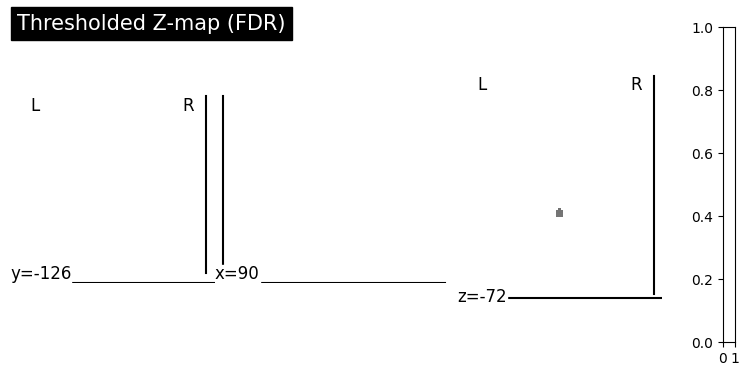

In [13]:
from nilearn.glm import threshold_stats_img

# Apply FDR correction to a z-map (q=0.05 for 5% false discovery rate)
thresholded_map, threshold = threshold_stats_img(z_maps[10], alpha=0.05, height_control='fdr')
plotting.plot_stat_map(thresholded_map, title="Thresholded Z-map (FDR)", threshold=threshold)
plotting.show()

In [16]:
import pandas as pd

feature_stats = []

for i, z_map in enumerate(z_maps):
    z_values = z_map.get_fdata().flatten()
    max_z = np.nanmax(z_values)  # Maximum z-score for the feature
    #feature_stats.append({'Feature': f'Feature_{i}', 'Max_Z': max_z})
    feature_stats.append({'Feature': f'{X.columns.tolist()[i]}', 'Max_Z': max_z})
df_stats = pd.DataFrame(feature_stats)
print(df_stats.sort_values(by='Max_Z', ascending=False))

                         Feature     Max_Z
169   Scene_movie_theater/indoor  7.395135
187                 Scene_stable  6.507638
164           Scene_lecture_room  6.201700
172  Scene_parking_garage/indoor  5.784784
168                 Scene_medina  5.750324
..                           ...       ...
135           Scene_car_interior  2.846707
28      action_jumpstyle dancing  2.830580
105            Objectsports ball  2.819028
78                     Objectcup  2.783909
96                   Objectchair  2.766840

[198 rows x 2 columns]


## Now let's proceed with PCA for the features

In [27]:
from sklearn.decomposition import PCA

# Set the number of components to keep (e.g., keep 95% of the variance)
pca = PCA(n_components=0.98)

# Fit PCA to the feature matrix and transform it
X_reduced = pca.fit_transform(X)

# Check the shape of the reduced X matrix
print(X_reduced.shape)

# Extract the data from the NIfTI image
Y_data = Y.get_fdata()  # Get the fMRI data as a NumPy array

# Reshape Y_data to 2D by flattening the spatial dimensions
n_samples = Y_data.shape[-1]  # Number of time points (382)
n_voxels = np.prod(Y_data.shape[:-1])  # Number of voxels (91 * 109 * 91)

# Reshape Y_data to have shape (n_samples, n_voxels)
Y_flattened = Y_data.reshape(n_samples, n_voxels)


# Check the new shape of Y
print(f"Shape of flattened Y: {Y_flattened.shape}")  # (382, n_voxels)

(382, 2)
Shape of flattened Y: (382, 902629)


In [29]:
import nibabel as nib

# Assuming Y_flattened is now a 2D NumPy array of shape (n_samples, n_voxels)

# First, reshape the flattened data back into its 3D form
Y_3d = Y_flattened.reshape(Y_data.shape[:-1] + (n_samples,))

# Create a NIfTI image from the reshaped data
nifti_img = nib.Nifti1Image(Y_3d, affine=Y.affine)

# Now you can pass this NIfTI image to the FirstLevelModel
model = FirstLevelModel(t_r=1.3)

# Fit the model to the NIfTI image
model.fit(nifti_img, design_matrices=X_reduced)

# If you still have issues, double-check the affine transformation and ensure that it matches the expected structure of your data

IndexError: list index out of range

In [25]:
print(f"Shape of X: {X.shape}")  # (n_samples, n_features)
print(f"Shape of X_reduced: {X_reduced.shape}")  # (n_samples, n_reduced_features)
print(f"Shape of Y: {Y.shape}")  # (n_samples, n_voxels)


Shape of X: (382, 198)
Shape of X_reduced: (382, 2)
Shape of Y: (91, 109, 91, 382)
